In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context = 'notebook' , style = 'whitegrid' , palette = 'Set1')


In [20]:
df= pd.read_csv('./Cleaned_df.csv')
df.dropna(inplace=True)


  Network  Counts
0      2G      16
1      3G     696
2      4G    2290
3      5G    2603


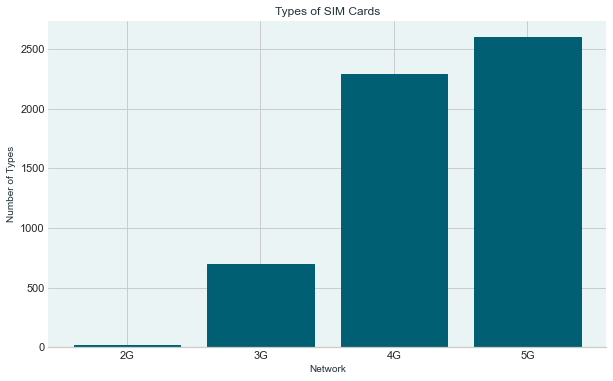

In [21]:
#problem1

df_1=df.copy()
df_1=df_1[(df_1['Network']=='2G')|(df_1['Network']=='3G')|(df_1['Network']=='4G')|(df_1['Network']=='5G')][['Network','Device_id']]
df_1=df_1.groupby('Network')['Device_id'].count().reset_index()
df_1['Counts']=df_1['Device_id'].cumsum()
df_1.drop('Device_id',axis=1, inplace=True)

print(df_1)
fig_1 , ax_1 = plt.subplots(figsize=(10,6))

ax_1.bar(df_1['Network'],df_1['Counts'] , facecolor = '#005f73' , edgecolor = '#005f73' )
ax_1.set_title("Types of SIM Cards", color='#22333b',fontsize=12)
ax_1.set_ylabel("Number of Types", color='#22333b', fontsize=10)
ax_1.set_xlabel("Network", color='#22333b', fontsize=10)

ax_1.set_facecolor("#EAF4f4")
ax_1.spines[['top', 'right', 'left']].set_visible(False)
ax_1.tick_params(length=0);
# fig_1.savefig('p1_Networks.png')

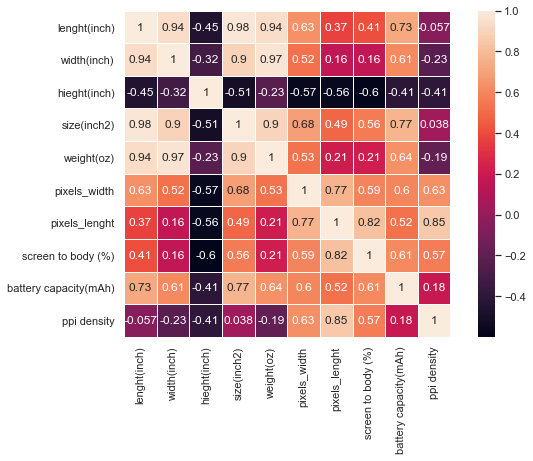

In [22]:
#problem2


# for inch and oz

df_2=df.copy()
df_2=df_2[['Body_Dimensions_hight_inches', 'Body_Dimensions_width_inches','Body_Dimensions_depth_inches',
     'Display_Size_inches','Body_Weight_oz','Display_Resolution_width','Display_Resolution_hight','screen_to_body_ratio',
     'Battery_Capacity_mAh','Display_Resolution_ppi']]

rename_cols=['lenght(inch)','width(inch)', 'hieght(inch)','size(inch2)','weight(oz)','pixels_width','pixels_lenght','screen to body (%)',
            'battery capacity(mAh)','ppi density']
df_2.columns=rename_cols
corr_data=df_2.corr()

fig_2_1,ax_2_1=plt.subplots(figsize=(10,6))
sns.heatmap(corr_data,annot=True, square=True, linewidth=.5);
# fig_2_1.savefig('p2_correlations_inch-oz.png')

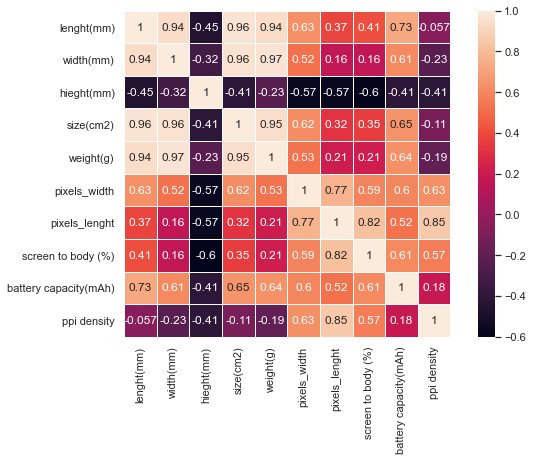

In [23]:
#problem2


# for mm and g

df_2=df.copy()
df_2=df_2[['Body_Dimensions_hight_mm', 'Body_Dimensions_width_mm','Body_Dimensions_depth_mm',
     'Display_Size_cm2','Body_Weight_g','Display_Resolution_width','Display_Resolution_hight','screen_to_body_ratio',
     'Battery_Capacity_mAh','Display_Resolution_ppi']]

rename_cols=['lenght(mm)','width(mm)', 'hieght(mm)','size(cm2)','weight(g)','pixels_width','pixels_lenght','screen to body (%)',
            'battery capacity(mAh)','ppi density']
df_2.columns=rename_cols
corr_data=df_2.corr()

fig_2_2,ax_2_2=plt.subplots(figsize=(10,6))
sns.heatmap(corr_data,annot=True, square=True, linewidth=.5);
# fig_2_2.savefig('p2_correlations(cm-g).png')

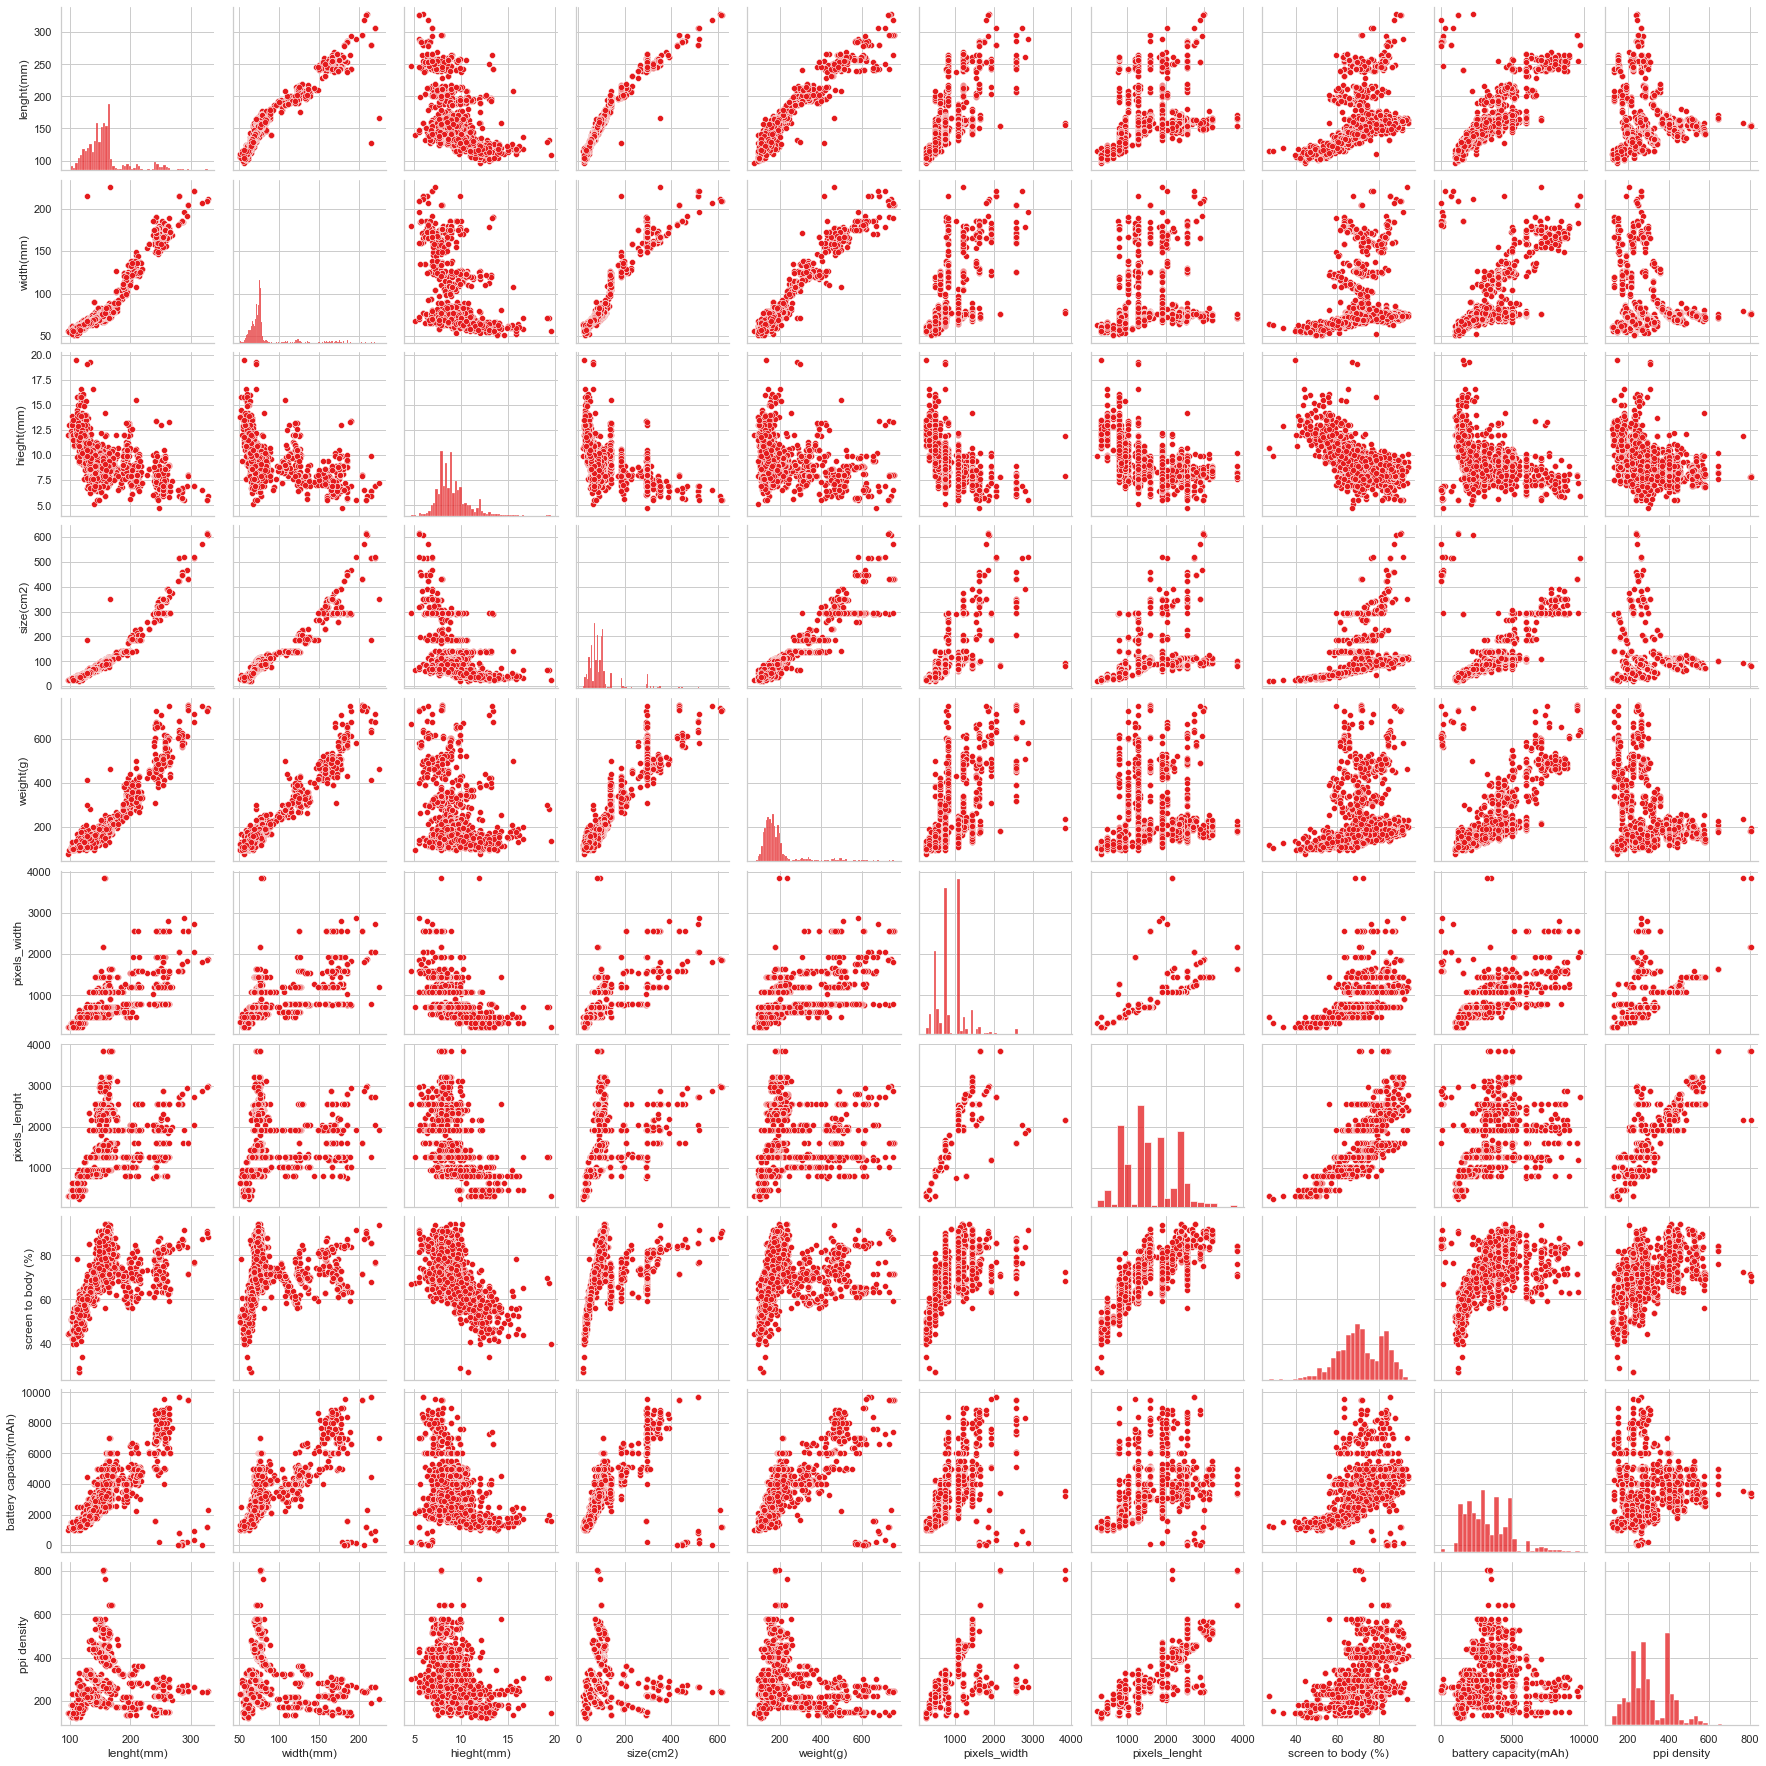

In [24]:
sns.pairplot(data = df_2 , palette = 'pastel');

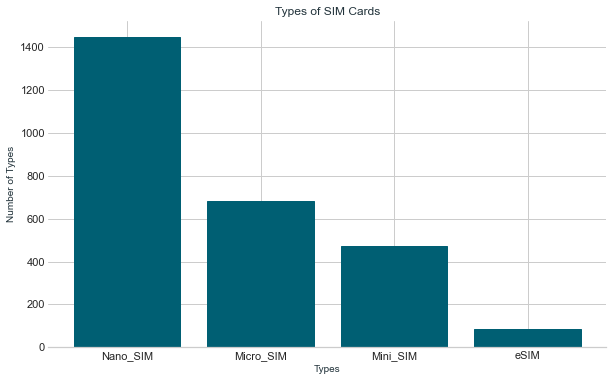

In [25]:
#problem 3


df_sim_type=df.copy()
df_sim_type=df_sim_type[['Nano_SIM','Micro_SIM','Mini_SIM','eSIM']]
sim_counts=df_sim_type.sum()
types=list(df_sim_type.keys())
counts=list(sim_counts.values)


fig_3 , ax_3 = plt.subplots(figsize=(10,6))

ax_3.bar(types,counts , facecolor = '#005f73' , edgecolor = '#005f73' )
ax_3.set_title("Types of SIM Cards", color='#22333b',fontsize=12)
ax_3.set_ylabel("Number of Types", color='#22333b', fontsize=10)
ax_3.set_xlabel("Types", color='#22333b', fontsize=10)


# ax_3.set_facecolor("#EAF4f4")
ax_3.spines[['top', 'right', 'left']].set_visible(False)
ax_3.tick_params(length=0);
# fig_3.savefig('p3_sim_types.png')

        



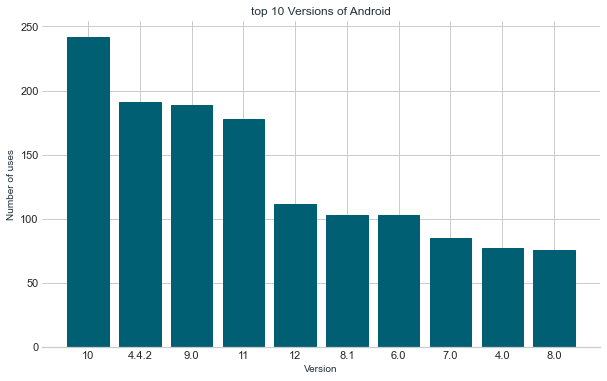

In [26]:
# problem 4


def edit_os_v(col):
    if col == '1':
        return '1.0'
    elif col == '2':
        return '2.0'
    elif col == '3':
        return '3.0'
    elif col == '4':
        return '4.0'
    elif col == '5':
        return '5.0'
    elif col == '6':
        return '6.0'
    elif col == '7':
        return '7.0'
    elif col == '8':
        return '8.0'
    elif col == '9':
        return '9.0'
    else:
        return col

df_4=df.copy()
df_4=df_4[df_4['Platform_OS']=='Android'][['Device_id','Platform_OS_version']]
df_4['Platform_OS_version']= df_4['Platform_OS_version'].apply(edit_os_v)
df_4



df_4.loc[~df_4['Platform_OS_version'].isna(),'Platform_OS_version'] = df_4.loc[~df_4['Platform_OS_version'].isna(),'Platform_OS_version'].apply(lambda col: col.split(','))
df_4 = df_4.explode('Platform_OS_version')
df_4.reset_index(inplace=True)
df_4.drop(columns=['index'], inplace=True)

df_4=df_4.groupby('Platform_OS_version').count().sort_values(by='Device_id',ascending=False)['Device_id'].iloc[:10]
df_4
versions=list(df_4.index)
values=list(df_4.values)


fig_4 , ax_4 = plt.subplots(figsize=(10,6))

ax_4.bar(versions,values , facecolor = '#005f73' , edgecolor = '#005f73' )
ax_4.set_title("top 10 Versions of Android", color='#22333b',fontsize=12)
ax_4.set_ylabel("Number of uses", color='#22333b', fontsize=10)
ax_4.set_xlabel("Version", color='#22333b', fontsize=10)


# ax_4.set_facecolor("#EAF4f4")
ax_4.spines[['top', 'right', 'left']].set_visible(False)
ax_4.tick_params(length=0);
# fig_4.savefig('p4_top10 versions.png')

In [27]:
df['Platform_OS'].unique()

array(['Android', 'Microsoft Windows', 'Firefox', 'iOS', 'iPadOS',
       'Microsoft Windows Phone', 'Microsoft Windows Mobile', 'HarmonyOS',
       'Harmony', 'EMUI', 'Symbian', 'MeeGo', 'Tizen', 'Linux'],
      dtype=object)

In [28]:
# problem 5

def OS(col):
    if col=='Android':
        return col
    elif col == 'iOS':
        return col
    else:
        return 'Other'


df_5=df.copy()
df_5=df_5[['Price','Platform_OS']]
df_5['Platform_OS'] = df_5['Platform_OS'].apply(OS)
df_5.sort_values(by = 'Price',ascending=False,inplace=True)
df_5=df_5.iloc[:50].reset_index(drop=True)
df_5_os=df_5.groupby('Platform_OS').count().reset_index()
df_5_pr=df_5.groupby('Price').count().reset_index()


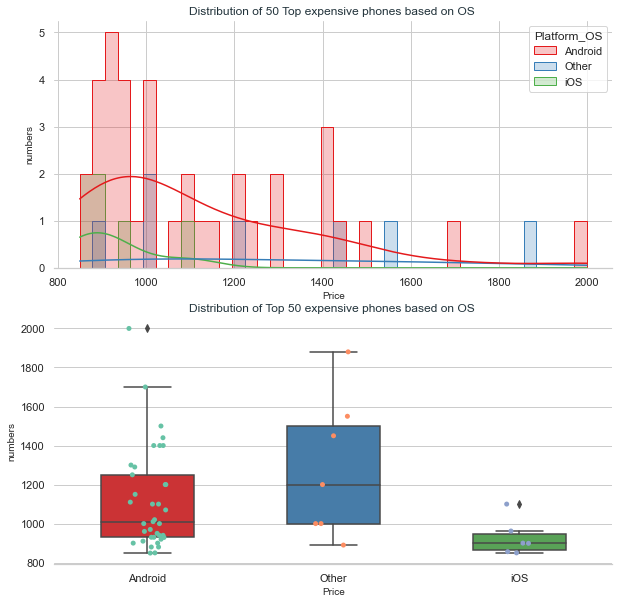

In [29]:
fig_5 , ax_5 = plt.subplots(2,1,figsize=(10,10))

sns.histplot(df_5,x='Price',hue='Platform_OS', bins=40,ax=ax_5[0],element="step", kde=True)
ax_5[0].set_title("Distribution of 50 Top expensive phones based on OS ", color='#22333b',fontsize=12)
ax_5[0].set_ylabel('numbers', fontsize=10)
ax_5[0].set_xlabel("Price", fontsize=10)
ax_5[0].spines[['top', 'right', 'left']].set_visible(False)


sns.stripplot(y=df_5['Price'],x=df_5['Platform_OS'], ax=ax_5[1],palette='Set2')
sns.boxplot(y=df_5['Price'],x=df_5['Platform_OS'], ax=ax_5[1],width=0.5)


ax_5[1].set_title("Distribution of Top 50 expensive phones based on OS ", color='#22333b',fontsize=12)
ax_5[1].set_ylabel('numbers', fontsize=10)
ax_5[1].set_xlabel("Price", fontsize=10);
ax_5[1].spines[['top', 'right', 'left']].set_visible(False)
# fig_5.savefig('p5_top 50.png')

c:\users\armag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


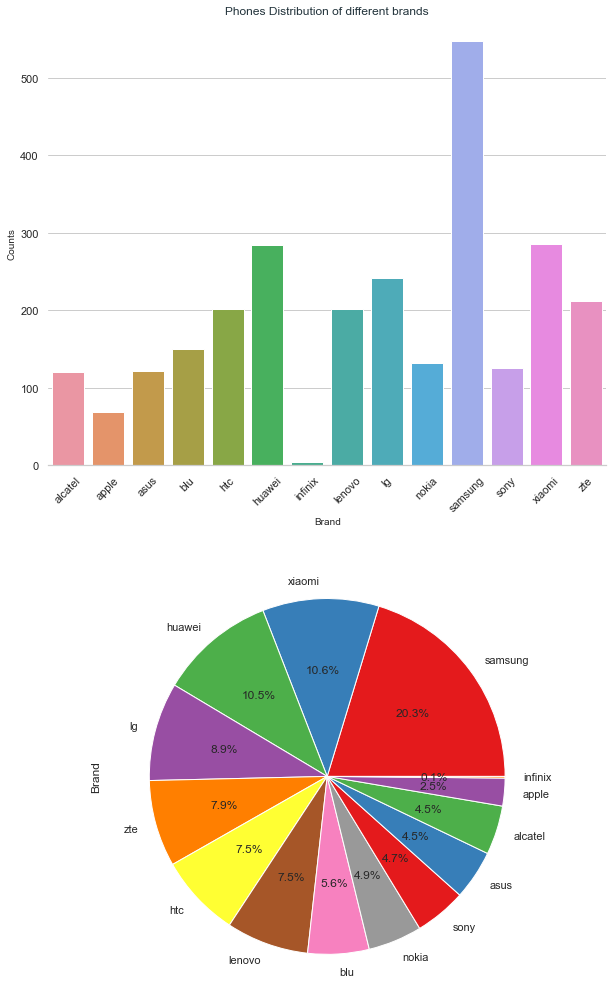

In [30]:
# problem 6

df_6=df.copy()
df_6=df_6[['Brand','Device_id','Year']]
df_6

fig_6, ax_6=plt.subplots(2,1,figsize=(10,18))
sns.countplot(df_6['Brand'],ax=ax_6[0])
ax_6[0].set_title("Phones Distribution of different brands", color='#22333b',fontsize=12)
ax_6[0].set_ylabel('Counts', fontsize=10)
ax_6[0].set_xlabel("Brand", fontsize=10)
ax_6[0].spines[['top', 'right', 'left']].set_visible(False)
ax_6[0].tick_params(axis='x', rotation=45)

brand_distribution = df['Brand'].value_counts()
brand_distribution.plot(kind='pie', autopct='%1.1f%%', ax=ax_6[1]);
# fig_6.savefig('p6_phones distribution.png')

c:\users\armag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


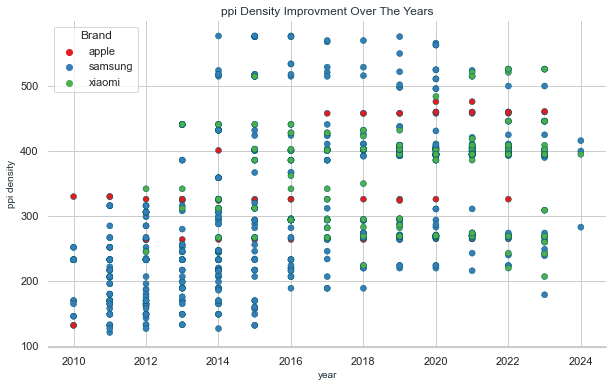

In [31]:
# problem 7

df_7=df.copy()


df_7=df_7[(df_7['Brand']=='samsung')|(df_7['Brand']=='apple')|(df_7['Brand']=='xiaomi')][['Year','Display_Resolution_ppi','Brand']]


fig_7 , ax_7 = plt.subplots(figsize=(10,6))

sns.scatterplot(df_7['Year'],df_7['Display_Resolution_ppi'], hue=df_7['Brand'] , facecolor = '#005f73' , edgecolor = '#005f73' )
ax_7.set_title("ppi Density Improvment Over The Years", color='#22333b',fontsize=12)
ax_7.set_ylabel("ppi density", color='#22333b', fontsize=10)
ax_7.spines[['top', 'right', 'left']].set_visible(False)
ax_7.set_xlabel("year", color='#22333b', fontsize=10);
# fig_7.savefig('p7_ppi trend.png')

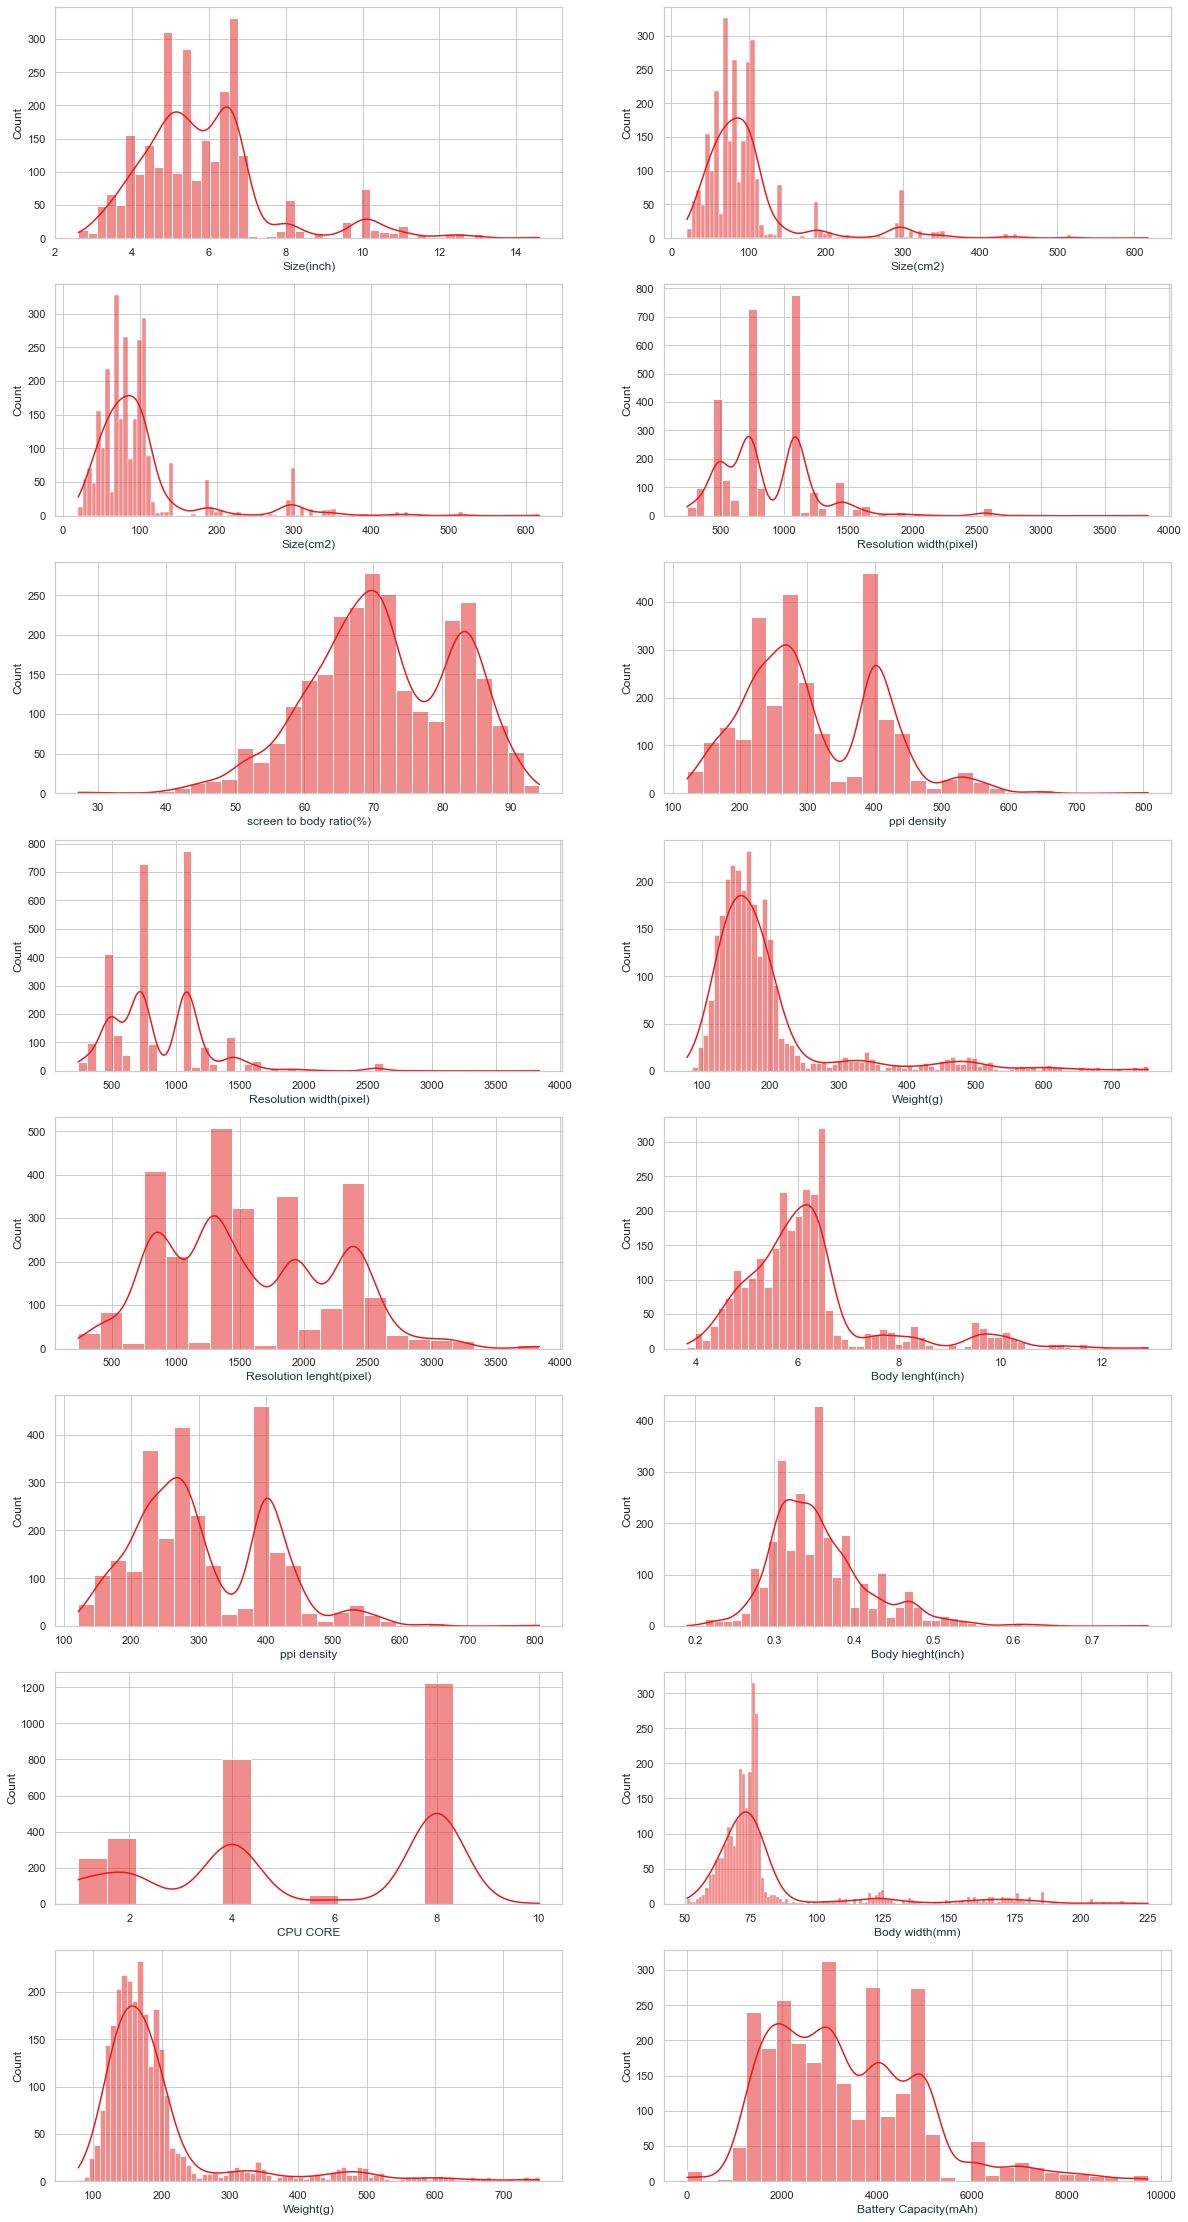

In [32]:
# problem 8
df_8=df.copy()
df_8=df_8[['Display_Size_inches', 'Display_Size_cm2','screen_to_body_ratio', 'Display_Resolution_width',
       'Display_Resolution_hight','Display_Resolution_ppi','Core_Num','Body_Weight_g', 'Body_Weight_oz',
       'Body_Dimensions_hight_inches', 'Body_Dimensions_width_inches','Body_Dimensions_depth_inches',
       'Body_Dimensions_hight_mm','Body_Dimensions_width_mm', 'Body_Dimensions_depth_mm',
       'Battery_Capacity_mAh', 'Price']]

x_labels=['Size(inch)','Size(cm2)','screen to body ratio(%)',
 'Resolution width(pixel)','Resolution lenght(pixel)','ppi density',
 'CPU CORE','Weight(g)','Weight(oz)','Body lenght(inch)',
 'Body width(inch)','Body hieght(inch)','Body lenght(mm)',
 'Body width(mm)','Body height(mm)','Battery Capacity(mAh)','Price(Euro)']

n=len(df_8.columns)
nrow=round(n/2)
ncol=2
fig_8, ax_8= plt.subplots(nrow,ncol,figsize=(20,40))

columns=list(df_8.columns)

for row in range(1,nrow+1):
    for col in range(1,ncol+1):
        sns.histplot(df_8[columns[row*col-1]],ax=ax_8[row-1][col-1], kde=True)
        ax_8[row-1][col-1].set_xlabel(f'{x_labels[row*col-1]}', color='#22333b', fontsize=12)

# fig_8.savefig('p8_distributions.png')

In [35]:
import zlib
import zipfile
import joblib

joblib.dump(fig_1,'p1_Networks')
joblib.dump(fig_2_1,'p2_correlations_inch-oz')
joblib.dump(fig_2_2,'p2_correlations_cm-g')
joblib.dump(fig_3,'p3_sim_types')
joblib.dump(fig_4,'p4_top10 versions')
joblib.dump(fig_5,'p5_top 50')
joblib.dump(fig_6,'p6_phones distribution')
joblib.dump(fig_7,'p7_ppi trend')
joblib.dump(fig_8,'p8_distributions')




def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("Descriptive statistics.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ['p1_Networks','p2_correlations_inch-oz','p2_correlations_cm-g','p3_sim_types','p4_top10 versions',
              'p5_top 50','p6_phones distribution','p7_ppi trend','p8_distributions', "Descriptive statistics.ipynb"]
compress(file_names)

File Paths:
['p1_Networks', 'p2_correlations_inch-oz', 'p2_correlations_cm-g', 'p3_sim_types', 'p4_top10 versions', 'p5_top 50', 'p6_phones distribution', 'p7_ppi trend', 'p8_distributions', 'Descriptive statistics.ipynb']
